# CRQ1: Does the fare for mile change across NY's borough?

Here we are going to analyze how much does a trip cost per mile, and compare that values between the boroughs.

We import the python libraries and the costume functions, defined in another file, that we will need for our analysis.

In [1]:
import CRQ1_functions
import matplotlib.pyplot

We build a dictonary contaning as keys the name of the boroughs and as values a list of the IDs associated, as seen in the reference file.

In [2]:
boroughs = CRQ1_functions.boroughsIdentifyer()

Now we are going to do two analisys. One over the price per mile of a trip, and nother on the price per mile of a trip weighted on the time of the trip. To do so we define two values $P$ and $Pw=\frac{P}{T}$ rispectivley the price per mile of a trip and it devided by the time the trip took. The aim of the second value $Pw$ is to take into account some possible variancies, for example the traffic.

To do so we call a function that will give us a dictonary of data frames where the keys are the boroughs, and the data frame contains the values of $P$ and $Pw$. In doing that, we exclude the trip for which $P>15$ and $P<0$ as we assume that they are do to errors, or other oddities non-interesting for an analysis as the one we are doing.

In [3]:
price_dfs = CRQ1_functions.price_calculator(boroughs)

First of all let us show what we obtained: we are going to visualize our datas in some graphs.

Plot for the values of P on the x-axis and how many occurences on the y-axis


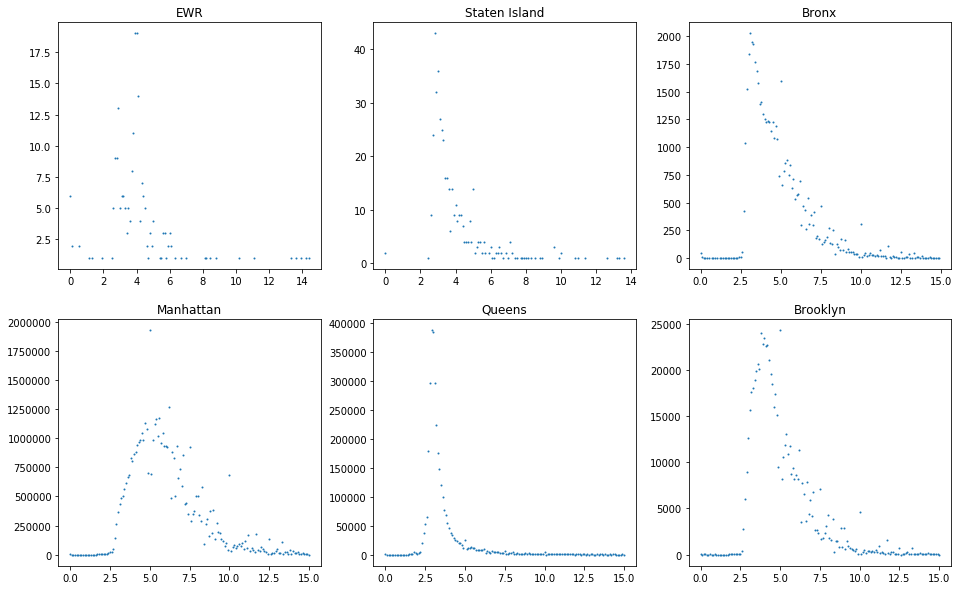

Plot for the values of Pw on the x-axis and how many occurences on the y-axis


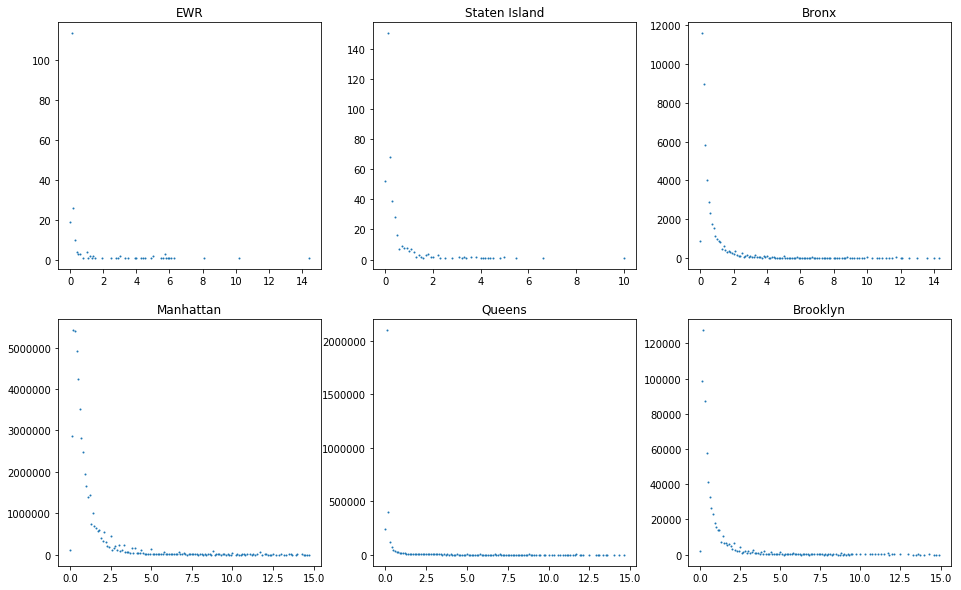

In [4]:
CRQ1_functions.grapher(price_dfs,boroughs)

Let us do some observations on thoses plots: we can clarly see that the data behave in similar ways for different boroughs (even if for EWR and Staten Island having a low amount of data make the graph not very clear).

We can observe that for $P$ the mean is, from borough to borough, inbetween 3 and 7, inducing us to think that there is a real and significant difference.

As for $Pw$ we don't notice a real difference anymore, at least from the graph.

In the end we didn't get a good final answer, so let us conduct some extra analysis, to try to understand what is going on.

Now we are going to compute mean and standard deviation of our datas. We will call a function that, given the data frame with the data, will return a couple of data frames containing the mean and standard deviation for $P$ and $Pw$ rispectively.

From a theoretical point of view we are considering a random variable $P$ that rappresent the price per mile of a trip and a sample of data, our values. We are now trying to infer information about the distribution that generated them.

In [5]:
Pdf, Pwdf = CRQ1_functions.mean_and_std(price_dfs,boroughs)

Let us observe what we obtained both as a simple table of values and as plots.

In [6]:
print('Mean and standard deviation for the value P')
Pdf

Mean and standard deviation for the value P


,Mean,Std
Manhattan,6.014227,2.059028
Brooklyn,4.969410,1.736342
Bronx,4.792749,1.820241
EWR,4.060818,2.124288
Staten Island,4.016794,1.772329
Queens,3.444867,1.130637


Mean of the values of P for the different boroughs with the standard deviation as error bars


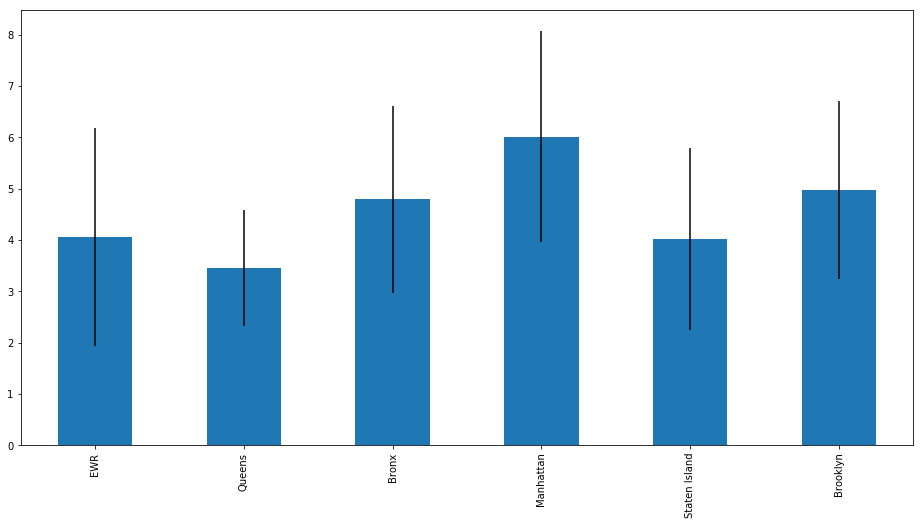

In [7]:
print('Mean of the values of P for the different boroughs with the standard deviation as error bars')
matplotlib.pyplot.show(Pdf.loc[[borough for borough in boroughs],['Mean']].plot(kind='bar', legend = False, yerr= list(map(lambda x:x[0],Pdf.loc[[borough for borough in boroughs],['Std']].values.tolist())), figsize = (16,8)))

In [8]:
print('Mean and standard deviation for the value Pw')
Pwdf

Mean and standard deviation for the value Pw


,Mean,Std
Manhattan,0.949533,1.231663
EWR,0.857146,1.923280
Brooklyn,0.758009,1.172647
Bronx,0.674276,1.173624
Staten Island,0.542046,1.034813
Queens,0.236065,0.626766


Mean of the values of Pw for the different boroughs with the standard deviation as error bars


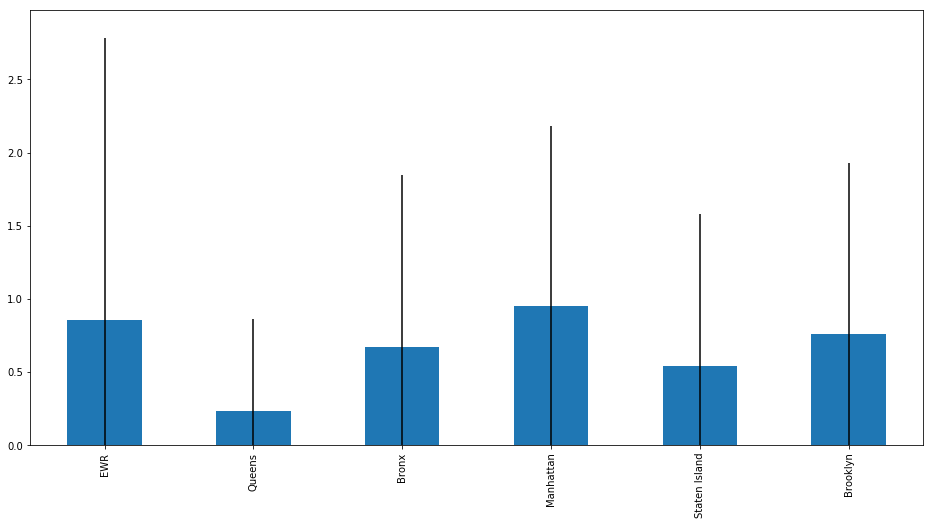

In [9]:
print('Mean of the values of Pw for the different boroughs with the standard deviation as error bars')
matplotlib.pyplot.show(Pwdf.loc[[borough for borough in boroughs],['Mean']].plot(kind='bar', legend = False, ylim=0, yerr= list(map(lambda x:x[0],Pwdf.loc[[borough for borough in boroughs],['Std']].values.tolist())), figsize = (16,8)))

As we observed before there is a strong difference in the mean for the values of $P$, things that bring us to think that in some zones taxis cost more per mile than in others. Once we normalize this data with the duration of the trip we can notice that the difference, while it still exists, is a lot less significant.

It is very interesting to us that once ordered this values by the mean both in the case of $P$ and of $Pw$ the boroughs are in the same order, excluding EWR. It seems therefore that including the time took for the trip heavly change the statistic for trip departing from EWR.

Aside from our observation, we are going to run some tests to check if these data are really dependents from the boroughs or 
not. To do so we are going to run the t-test on each couple of boroughs as, as we observed, is reasonable to assume that the distribution of the data follow a gaussian curve.

The next function will return two data frames, one for $P$ and the other for $Pw$, with as index of column and row the two boroughs compared, and as values the p-value of the t-test.

In [10]:
PTest, PwTest = CRQ1_functions.ttester(price_dfs,boroughs)

In [11]:
print('Table showing the result of the t-test for P.\nThe entry are, rispectively, the t-value and the p-value.')
PTest

Table showing the result of the t-test for P.
The entry are, rispectively, the t-value and the p-value.


,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
Bronx,1.0,0.0,0.000,0.0,0.0,0.000
Brooklyn,0.0,1.0,0.000,0.0,0.0,0.000
EWR,0.0,0.0,1.000,0.0,0.0,0.778
Manhattan,0.0,0.0,0.000,1.0,0.0,0.000
Queens,0.0,0.0,0.000,0.0,1.0,0.000
Staten Island,0.0,0.0,0.778,0.0,0.0,1.000


In [12]:
print('Table showing the result of the t-test for Pw.\nThe entry are, rispectively, the t-value and the p-value.')
PwTest

Table showing the result of the t-test for Pw.
The entry are, rispectively, the t-value and the p-value.


,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
Bronx,1.000,0.000,0.022,0.000,0.0,0.017
Brooklyn,0.000,1.000,0.211,0.000,0.0,0.000
EWR,0.022,0.211,1.000,0.267,0.0,0.006
Manhattan,0.000,0.000,0.267,1.000,0.0,0.000
Queens,0.000,0.000,0.000,0.000,1.0,0.000
Staten Island,0.017,0.000,0.006,0.000,0.0,1.000


As we can see our p-values are, in general, very low for $P$. That confirm our intuiton given from the means that the price change between different boroughs.

On the other hand for $Pw$ we clearly remark that the p-values of EWR are quite high, even above the trashold of $0.05$ for some borough. We shuold therefore consider it, as before, as a special borough. It is natural to have found some particularity on EWR. Ee already noticed before that considering the time took by the trip heavly modify the statistic for EWR.

Let us remark one last thing: the p-values for the couple Brooklyn-Queens is $0$, the one for EWR-Queens is $0$, but the one for EWR-Brooklyn is $0.272$. It may seems odd, but keep in mind that we know that the standard deviation for the $Pw$ of EWR is very high compared to the one of the others, therefore is not unattended some oddities about its data.